In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load CSV files into dataframes and merge them using the Year field as an index
candidates = pd.read_csv('sig.tse.jus.br/candidates.csv')
candidates.set_index(['year'], inplace=True)
voters = pd.read_csv('sig.tse.jus.br/voters.csv')
voters.set_index(['year'], inplace=True)
election = pd.merge(candidates, voters,  how="outer", on=["year"])

# releases the memory allocated to dataframes
del[[candidates,voters]]

# Convert all fields of type float to integer in the dataframe
for col in election.columns:
    if election[col].dtype == 'float64':
        election[col] = election[col].astype('Int64')

# Sort dataframes data in descending order by year        
election.sort_values(by=['year'], ascending=False, inplace=True)

# Fill NA/NaN values with 0
election.fillna(0, inplace=True)

#Filters data from the years in which municipal elections took place in Brazil
municipal_election = election.filter(items=[2020,2016,2012,2008,2004,2000],axis=0)

# calculates the percentage of data changes from year to year
# and sorts in descending order by year
pct_change_municipal_election = municipal_election.sort_values(by=['year'])\
    .pct_change().sort_values(by=['year'],ascending=False)\
    .rename(columns={"candidates": "pct_change_candidates", "voters": "pct_change_voters"})

# Includes calculations of percentages of data changes in the municipal elections dataframe
municipal_election = municipal_election.merge(pct_change_municipal_election, how="outer", on=["year"])

del[[pct_change_municipal_election]]

#print(municipal_election['pct_change_voters'].fillna(0))

#print(municipal_election)

year
2020    0.026578
2016     0.04002
2012         inf
2008         NaN
2004         NaN
2000         0.0
Name: pct_change_voters, dtype: Float64
      candidates     voters  pct_change_candidates  pct_change_voters
year                                                                 
2020      557910  147918483               0.122205           0.026578
2016      497155  144088912               0.029162            0.04002
2012      483068  138544348               0.266409                inf
2008      381447          0              -0.050629                NaN
2004      401789          0               0.046972                NaN
2000      383763          0                   <NA>               <NA>


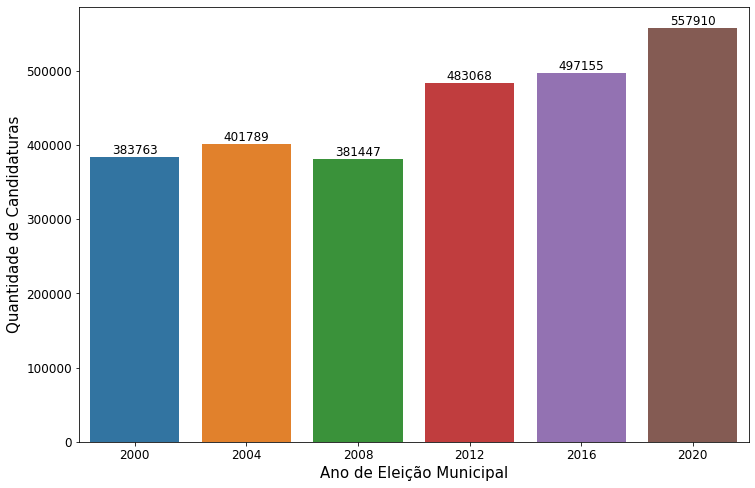

In [5]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election.index, y="candidates", data=municipal_election)

#sns.despine()
#sns.set_style('white')

# Setting the x-acis label and its size
plt.xlabel("Ano de Eleição Municipal", size=15)
# changing the fontsize of xticks
plt.xticks(fontsize=12)

# Setting the y-axis label and its size
plt.ylabel("Quantidade de Candidaturas",size=15)
# changing the fontsize of yticks
plt.yticks(fontsize=12)

# displays the data values in the graph
splot.bar_label(splot.containers[0],size=12)

plt.savefig("number_candidates_municipal_elections.jpg",transparent = False)

# print(municipal_election)

# plotting the graph
plt.show()